<a href="https://colab.research.google.com/github/danielborbavareladossantos/colab/blob/master/aspirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O robo ficara executando sem parar, será nescessário forçar a parada, ou limitar usando o for invés de while, função já esta ali so precisa descomentar. Caso queira executar de maneira estatica também esta no código só será necessário descomentar o estático e comentar o dinâmico

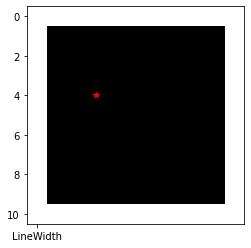

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import randrange

# Define direções que o robo irá seguir
direcao = 0
elevacao = 0

# Declaração da matriz de ambiente do robo (dinamico)
m = []
# Ambiente do robo (estatico)
# m = [
#      [1,1,1,1,1,1],
#      [1,0,0,0,0,1],
#      [1,2,0,0,0,1],
#      [1,0,0,0,0,1],
#      [1,0,0,2,2,1],
#      [1,1,1,1,1,1],
# ]

# Tamanho da matriz
tam = 10

# Neste caso o robo começa na posição [1][1]
# posX = 1
# posY = 1
# Neste caso o robo começa em posições aleatórias
posX = randrange(1,tam-1)
posY = randrange(1,tam-1)

def geradorDeMundos(tamanho):
  global m

  for x in range(0,tamanho+1):
    linha = []
    for y in range(0,tamanho+1):

      if (y==0 or x==0 or y == tamanho or x == tamanho):
        linha.append(1)
      else:
        linha.append(2 if(randrange(0,50)>25) else 0)

    m.append(linha)

# Trabalha com o canvas
def exibir(matriz):

  # Para dev.
  # for i in range(0, 40):

  # Execute eterno
  while(True):

    # Mostrar matriz
    plt.imshow(matriz, 'gray')
    plt.plot(posX, posY, '*r', 'LineWidth', 5)
    plt.show(block=False)

    # Chama função de lógica
    theWalkingClean()
    # Pausa a execução do código por 0,5 segundos, para facilitar a visualização
    plt.pause(0.5)
    plt.clf()

    # Limpa plots para dar efeito de frames
    clear_output(wait=True)

# Faz lógica do robo
def theWalkingClean():

  # Declarações de variaveis globais
  global posX
  global posY
  global m
  global direcao
  global elevacao

  # Suga toda sujeira
  if m[posY][posX] == 2:
    m[posY][posX] = 0

  # Verifica se não ta na hora de começar a subir
  if (m[posY][posX-1] == 1) and (m[posY+1][posX] == 1) and elevacao == 0:
    elevacao = 1

  # Verifica se não ta na hora de começar a descer
  if (m[posY][posX+1] == 1) and (m[posY-1][posX] == 1) and elevacao == 1:
    elevacao = 0

  # Verifica se não ta na hora de mudar de direção (Esquerda)
  if m[posY][posX+1] == 1 and direcao == 0:
    # Com base na elevação
    if elevacao == 0:
      posY += 1
    if elevacao == 1:
      posY -= 1
    direcao = 1
    return

  # Verifica se não ta na hora de mudar de direção (Direita)
  if m[posY][posX-1] == 1 and direcao == 1:
    # Com base na elevação
    if elevacao == 0:
      posY += 1
    if elevacao == 1:
      posY -= 1
    direcao = 0
    return

  # Se tiver indo para direita avança uma casa
  if ((m[posY][posX+1] == 0) or (m[posY][posX+1] == 2)) and direcao == 0:
    posX += 1

  # Se tiver indo para esquerda avança uma casa
  if ((m[posY][posX-1] == 0) or (m[posY][posX-1] == 2)) and direcao == 1:
    posX -= 1

# Gerar mundo aleatório
geradorDeMundos(tam)
# Chamada da função principal
exibir(m)

Teste de função gerador de mundos

In [ ]:
from random import randrange

m = []

def geradorDeMundos():
  global m
  tamanho = 6

  for x in range(0,tamanho+1):
    linha = []
    for y in range(0,tamanho+1):

      if (y==0 or x==0 or y == tamanho or x == tamanho):
        linha.append(1)
      else:
        linha.append(2 if(randrange(0,50)>25) else 0)

    m.append(linha)

geradorDeMundos()
print(m)

[[1, 1, 1, 1, 1, 1, 1], [1, 2, 0, 2, 2, 0, 1], [1, 2, 0, 0, 0, 2, 1], [1, 0, 2, 0, 0, 0, 1], [1, 2, 0, 0, 0, 0, 1], [1, 0, 2, 2, 2, 2, 1], [1, 1, 1, 1, 1, 1, 1]]
